In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dt=pd.read_csv('social_network_ads.csv')

In [2]:
dt

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
dt["Gender"].replace({"Male":1,"Female":0}, inplace=True)
dt


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [4]:
dt=dt.drop(columns="User ID")

In [8]:
dt.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [9]:
dt.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


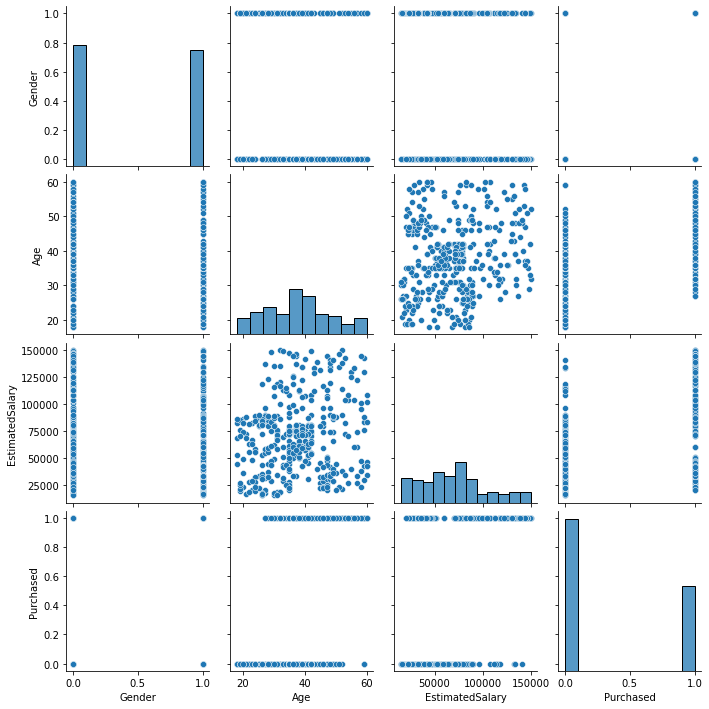

In [10]:
sns.pairplot(dt)
plt.show()

In [11]:
x=dt[['Gender', 'Age', 'EstimatedSalary']]
y=dt['Purchased']

In [12]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

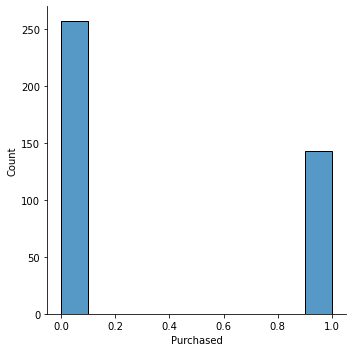

In [13]:
sns.displot(dt["Purchased"])

In [14]:
corr_matrix=dt.corr()

<AxesSubplot:>

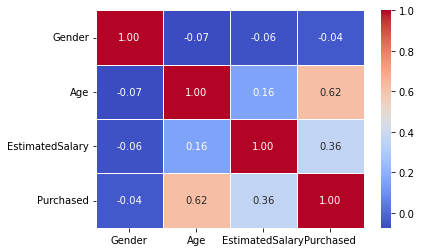

In [15]:
sns.heatmap(corr_matrix,annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [19]:
x_train

,Gender,Age,EstimatedSalary
250,0,44,39000
63,1,32,120000
312,0,38,50000
159,0,32,135000
283,0,52,21000
...,...,...,...
323,0,48,30000
192,1,29,43000
117,1,36,52000
47,0,27,54000


In [20]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [21]:
y_train

250    0
63     1
312    0
159    1
283    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 300, dtype: int64

In [22]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_pred = model.predict(x_test)

In [24]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

<AxesSubplot:>

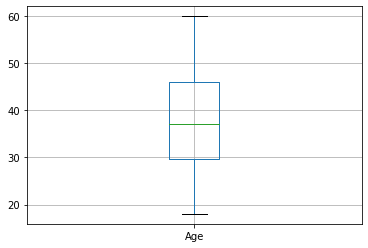

In [25]:
col = ["Age"]
dt.boxplot(col)

In [26]:
model.score(x_train,y_train)

0.63

In [27]:
model.score(x_test,y_test)

0.68

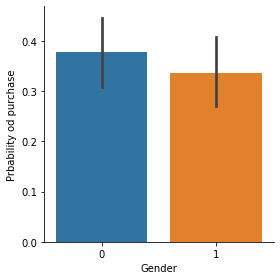

In [28]:
c=sns.catplot(x="Gender",y="Purchased", data=dt,kind="bar",height=4)
c.set_ylabels("Prbability od purchase")

In [29]:
ct = pd.crosstab(dt["Gender"],dt["Purchased"],normalize="index")
print(ct)

Purchased         0         1
Gender                       
0          0.622549  0.377451
1          0.663265  0.336735


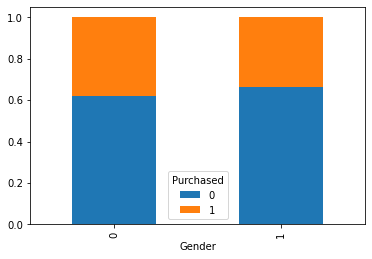

In [30]:
ct.plot.bar(figsize=(6,4), stacked=True)
plt.show()

In [31]:
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score, recall_score

In [32]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[68,  0],
       [32,  0]], dtype=int64)

In [33]:
tn,fp,tp,fn=confusion_matrix(y_test,y_pred).ravel()

In [34]:
a=accuracy_score(y_test,y_pred)    #tp+tn/total values
print("Accuracy score:",a)

Accuracy score: 0.68


In [35]:
r=recall_score(y_test,y_pred)
print("Recall score:",r)

Recall score: 0.0


In [36]:
p=precision_score(y_test,y_pred)
print("Precision score:",p)

Precision score: 0.0


C:\Users\PRIYANKA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
e=1-a
print("Error rate:",e)

Error rate: 0.31999999999999995
